In [3]:
pip install pandas numpy geopandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Reading the CSV file into Python
data = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\NSSO68 (2).csv")


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6804\705940788.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\NSSO68 (2).csv")


In [7]:
# Filtering for ARP
df = data[data['state_1'] == "ARP"]


In [8]:
# Display dataset info
print("Dataset Information:")
print(df.columns)
print(df.head())
print(df.shape)

Dataset Information:
Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)
        slno                                 grp  Round_Centre  FSU_number  \
34385  34386  47799999999999997629080342102016.0             1       47810   
34386  34387  47799999999999997629080342102016.0             1       47810   
34387  34388  47799999999999997629080342102016.0             1       47810   
34388  34389  47799999999999997629080342102016.0             1       47810   
34389  34390  47799999999999997629080342102016.0             1       47810   

       Round  Schedule_Number  Sample  Sector  state  State_Region  ...  \
34385     68               10       1       2     12           121  ...   
34386     68    

In [9]:
# Finding missing values
missing_info = df.isna().sum()
print("Missing Values Information:")
print(missing_info)


Missing Values Information:
slno              0
grp               0
Round_Centre      0
FSU_number        0
Round             0
                 ..
foodtotal_q       0
state_1           0
Region            0
fruits_df_tt_v    0
fv_tot            0
Length: 384, dtype: int64


In [10]:
# Subsetting the data
arpnew = df[['state_1', 'District', 'Region', 'Sector', 'State_Region', 'Meals_At_Home', 'ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q', 'No_of_Meals_per_day']]

In [11]:
# Impute missing values with mean for specific columns
arpnew['Meals_At_Home'].fillna(arpnew['Meals_At_Home'].mean(), inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6804\3472033185.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  arpnew['Meals_At_Home'].fillna(arpnew['Meals_At_Home'].mean(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6804\3472033185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arpnew['Meals_At_Home'].fillna(arpnew['Mea

In [12]:
# Finding outliers and removing them
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - (1.5 * IQR)
    upper_threshold = Q3 + (1.5 * IQR)
    df = df[(df[column_name] >= lower_threshold) & (df[column_name] <= upper_threshold)]
    return df

In [13]:
outlier_columns = ['ricepds_v', 'chicken_q']
for col in outlier_columns:
    arpnew = remove_outliers(arpnew, col)

In [14]:
# Summarize consumption
arpnew['total_consumption'] = arpnew[['ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q']].sum(axis=1)

In [15]:
# Summarize and display top consuming districts and regions
def summarize_consumption(df, group_col):
    summary = df.groupby(group_col)['total_consumption'].sum().reset_index()
    summary = summary.sort_values(by='total_consumption', ascending=False)
    return summary


In [16]:
district_summary = summarize_consumption(arpnew, 'District')
region_summary = summarize_consumption(arpnew, 'Region')

In [17]:
print("Top Consuming Districts:")
print(district_summary.head(4))
print("Region Consumption Summary:")
print(region_summary)


Top Consuming Districts:
    District  total_consumption
3          4        8167.772411
7          8        6291.135714
12        13        6177.766661
1          2        5759.773413
Region Consumption Summary:
   Region  total_consumption
0       1        56175.67036


In [19]:
# Rename districts and sectors
district_mapping = {
    "4": "papum pare", "8": "east siang", "13": "tirap", "2": "west kameng",
    "1": "tawang", "15": "kurungkumey", "11": "lohit", "7": "west siang",
    "12": "changlang", "3": "east kameng", "9": "upper siang", "6": "upper subansiri",
    "5": "lower subansiri", "16": "lower dibang", "14": "anjaw", "10": "dibang valley"
}

In [20]:
sector_mapping = {"2": "URBAN", "1": "RURAL"}


In [21]:
arpnew['District'] = arpnew['District'].astype(str).map(district_mapping).fillna(arpnew['District'])
arpnew['Sector'] = arpnew['Sector'].astype(str).map(sector_mapping).fillna(arpnew['Sector'])

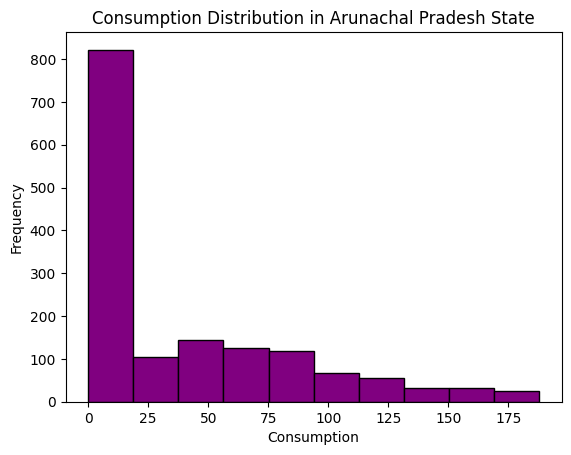

In [22]:
# Plot histogram of total consumption
plt.hist(arpnew['total_consumption'], bins=10, color='purple', edgecolor='black')
plt.xlabel("Consumption")
plt.ylabel("Frequency")
plt.title("Consumption Distribution in Arunachal Pradesh State")
plt.show()


In [23]:
# Summarize total consumption per district
ARP_consumption = arpnew.groupby('District')['total_consumption'].sum().reset_index()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6804\54858683.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_consumption', y='District', data=ARP_consumption, palette='Purples_d')


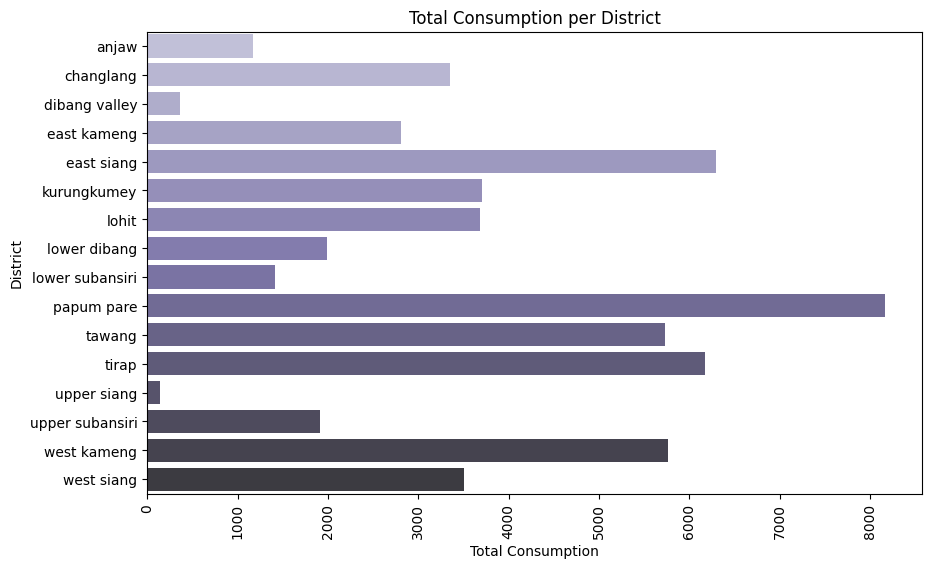

In [24]:
# Plot bar chart of total consumption per district
plt.figure(figsize=(10, 6))
sns.barplot(x='total_consumption', y='District', data=ARP_consumption, palette='Purples_d')
plt.xlabel("Total Consumption")
plt.ylabel("District")
plt.title("Total Consumption per District")
plt.xticks(rotation=90)
plt.show()

In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load CSV data with explicitly defined data types to avoid DtypeWarning
dtype = {'state_1': str, 'District': str, 'total_consumption': float}  # Adjust dtype as per your data
try:
    df = pd.read_csv('C:\\Users\\LENOVO\\Downloads\\NSSO68.csv', dtype=dtype, low_memory=False)
except FileNotFoundError:
    print("File not found. Please check the file path and try again.")
    # Exit or handle accordingly if file is essential for further processing

# Proceed with the rest of your code as previously outlined...


In [9]:
# Filter for Arunachal Pradesh
df_arp = df[df['state_1'] == 'ARP'].copy()  # Make a copy to avoid SettingWithCopyWarning

In [10]:
# District mapping dictionary
district_mapping = {
    "1": "tawang",
    "2": "west kameng",
    "3": "East Kameng",
    "4": "Papum Pare *",
    "5": "Lower Subansiri",
    "6": "Upper Subansiri",
    "7": "West Siang",
    "8": "East Siang",
    "9": "Upper Siang *",
    "10": "Dibang Valley",
    "11": "Lohit",
    "12": "Changlang",
    "13": "Tirap",
    "14": "Anjaw",
    "15": "Kurungkumey",
    "16": "Lower Dibang Valley"
}

In [15]:
print(df_arp.head())
print(df_arp.info())


        slno       grp  Round_Centre  FSU_number  Round  Schedule_Number  \
34385  34386  4.78E+31             1       47810     68               10   
34386  34387  4.78E+31             1       47810     68               10   
34387  34388  4.78E+31             1       47810     68               10   
34388  34389  4.78E+31             1       47810     68               10   
34389  34390  4.78E+31             1       47810     68               10   

       Sample  Sector  state  State_Region  ... pickle_v  sauce_jam_v  \
34385       1       2     12           121  ...    0.020          0.0   
34386       1       2     12           121  ...    0.000          0.0   
34387       1       2     12           121  ...    0.009          0.0   
34388       1       2     12           121  ...    0.000          0.0   
34389       1       2     12           121  ...    0.000          0.0   

       Othrprocessed_v  Beveragestotal_v  foodtotal_v  foodtotal_q  state_1  \
34385              0.0   

In [18]:
# Subset the data
arp_new = df_arp[['state_1', 'District', 'Region', 'Sector', 'State_Region', 
                  'Meals_At_Home', 'ricepds_v', 'Wheatpds_q', 'chicken_q', 
                  'pulsep_q', 'wheatos_q', 'No_of_Meals_per_day']].copy()


In [19]:
# Check for missing values
print("Missing Values in Subset:")
print(arp_new.isna().sum())

Missing Values in Subset:
state_1                0
District               0
Region                 0
Sector                 0
State_Region           0
Meals_At_Home          3
ricepds_v              0
Wheatpds_q             0
chicken_q              0
pulsep_q               0
wheatos_q              0
No_of_Meals_per_day    0
dtype: int64


In [21]:
# Impute missing values with mean for specific columns (if needed)
arp_new['Meals_At_Home'].fillna(arp_new['Meals_At_Home'].mean(), inplace=True)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16492\885439044.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  arp_new['Meals_At_Home'].fillna(arp_new['Meals_At_Home'].mean(), inplace=True)


In [22]:
# Impute missing values with mean for specific columns
arp_new['Meals_At_Home'].fillna(arp_new['Meals_At_Home'].mean(), inplace=True)  # Corrected approach

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16492\462145826.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  arp_new['Meals_At_Home'].fillna(arp_new['Meals_At_Home'].mean(), inplace=True)  # Corrected approach


In [23]:
# Finding outliers and removing them (if necessary)
# Define a function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [24]:
outlier_columns = ['ricepds_v', 'chicken_q']
for col in outlier_columns:
    arp_new = remove_outliers(arp_new, col)

In [25]:
# Summarize consumption
arp_new['total_consumption'] = arp_new[['ricepds_v', 'Wheatpds_q', 'chicken_q', 
                                        'pulsep_q', 'wheatos_q']].sum(axis=1, skipna=True)


In [26]:
# Display district consumption summary
district_summary = arp_new.groupby('District')['total_consumption'].sum().reset_index()
print("District Consumption Summary:")
print(district_summary)

District Consumption Summary:
               District  total_consumption
0                 Anjaw        1174.099405
1             Changlang        3351.452940
2         Dibang Valley         368.750000
3           East Kameng        2809.257552
4            East Siang        6291.135714
5           Kurungkumey        3706.589394
6                 Lohit        3678.872222
7   Lower Dibang Valley        1987.276862
8       Lower Subansiri        1417.018687
9          Papum Pare *        8167.772411
10                Tirap        6177.766661
11        Upper Siang *         139.898810
12      Upper Subansiri        1915.960626
13           West Siang        3501.018680
14               tawang        5729.026984
15          west kameng        5759.773413


In [27]:
# Mapping districts for easier merging
district_mapping = {
    "1": "tawang",
    "2": "west kameng",
    "3": "East Kameng",	
    "4": "Papum Pare *",	
    "5": "Lower Subansiri",	
    "6": "Upper Subansiri",	
    "7": "West Siang",	
    "8": "East Siang",	
    "9": "Upper Siang *",	
    "10": "Dibang Valley",	
    "11": "Lohit",	
    "12": "Changlang",	
    "13": "Tirap",	
    "14": "Anjaw",	
    "15": "Kurungkumey",	
    "16": "Lower Dibang Valley"
}

In [28]:
arp_new['District'] = arp_new['District'].astype(str).map(district_mapping)


In [30]:
# Step 2: Load GeoJSON File for Arunachal Pradesh Districts
data_map = gpd.read_file("C:\\Users\\LENOVO\\Downloads\\ARUNACHAL PRADESH_DISTRICTS.geojson")


In [31]:
# Rename district column to match data
data_map.rename(columns={'dtname': 'District'}, inplace=True)


In [32]:
# Step 3: Merge Data and Plotting
data_map_data = pd.merge(data_map, district_summary, on='District', how='inner')

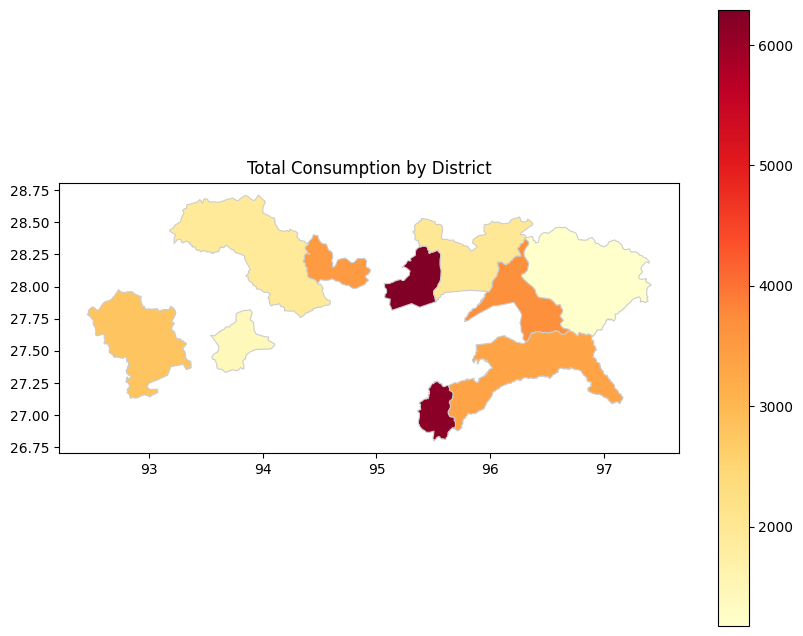

In [33]:
# Plotting using geopandas and matplotlib
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
data_map_data.plot(column='total_consumption', cmap='YlOrRd', linewidth=0.8, ax=ax, 
                   edgecolor='0.8', legend=True)
ax.set_title('Total Consumption by District')
plt.show()